# <span style="color: blue;">ให้กรอกรหัสนิสิต และชื่อ-นามสกุล</span>

## รหัสนิสิต ชื่อ-นามสกุล
<span style="color: green;">6714450249 นายหรินทร์ ธนะนาม</span>

## สร้างและเทรนโมเดล CNN เพื่อจำแนกภาพ

### รูปภาพที่ให้มามี 4 คลาส โดยมีหมายเลขและชื่อคลาสดังนี้
<ol start="0" style="font-size: 18px">
<li>airplane
<li>automobile
<li>ship
<li>truck
</ol>

In [ ]:
import time, datetime
import requests, pickle
import numpy as np
from tensorflow import keras
from IPython import display

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os

os.environ['TF_DETERMINISTIC_OPS'] = '1'
# os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # uncomment to Disable GPU training

In [3]:
import random, tensorflow as tf

def set_seed(seed_value=12345):
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)
    os.environ['PYTHONHASHSEED'] = str(seed_value)

In [ ]:
print('Default GPU Device:', tf.test.gpu_device_name() or 'None')

In [5]:
class_names = ['.', '..', '...', '....']

(_X_train, _y_train, _X_test, _y_test) = pickle.load(open('564_midterm_data_68.pkl', "rb"))

### ดูรูปภาพในชุดข้อมูล

In [6]:
def show_images(X, y, class_names, n_rows=3, n_cols=8, figsize=(9, 4)):
    fig = plt.figure(figsize=figsize)
    for i in range(0, n_rows):
        for j in range(0, n_cols):
            idx = i*n_cols + j
            image = X[idx]
            label = class_names[y[idx][0]]        
            ax = plt.subplot(n_rows, n_cols, idx+1)
            plt.imshow(image)
            plt.text(16, 36, str(y[idx]) + ' - ' + label, ha='center')
            plt.axis('off')
    plt.tight_layout()
    plt.show()

[2] ...


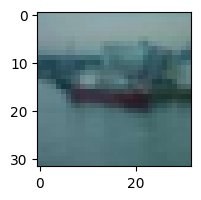

In [7]:
print(_y_test[1], class_names[_y_test[1][0]])
plt.figure(figsize=(2, 2))
plt.imshow(_X_test[1])

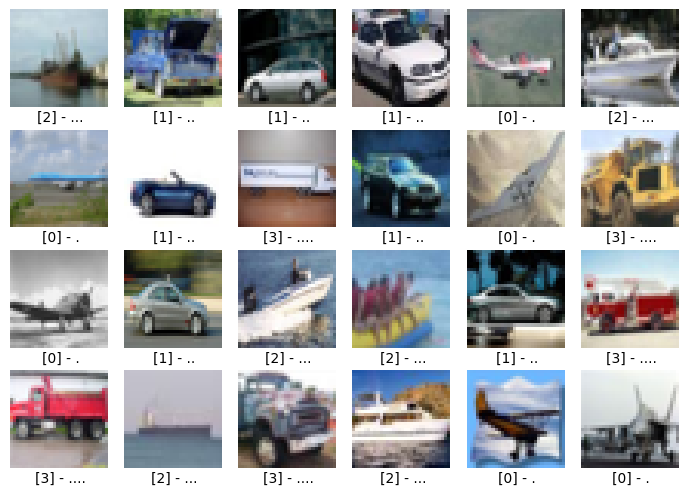

In [8]:
show_images(_X_train, _y_train, class_names, 4, 6, figsize=(7, 5))

<style> h3 { margin-top: 0.5em !important; margin-bottom: 0.0em; }
        h4 { margin-top: 0.1em !important; margin-bottom: 0.1em; }
        h5 { margin-top: 0.0em; margin-bottom: 0.2em; } </style>

# <span style="color:blue">โจทย์คำถาม</span>
* ### เพื่อป้องกันผลกระทบจาก randomness ให้นิสิตใช้ค่า seed เป็น 12345 ในทุกกรณีที่เกี่ยวข้องกับการสุ่ม และให้เรียกใช้ฟังก์ชัน set_seed(12345) ทุกครั้งก่อนที่จะสร้างโมเดล
* ### ให้แยกคำตอบของแต่ละข้อออกเป็นสัดส่วนที่ชัดเจน โดยใช้ markdown หรือ heading เพื่อระบุว่าคำตอบใน cell นั้นเป็นของโจทย์ข้อใด

## <span style="color:blue"> 1. (10 คะแนน) ให้แบ่งชุดข้อมูล test ออกเป็น 2 ส่วนในอัตราส่วน 80:20 และข้อมูลทั้ง 2 ส่วนนี้ให้แต่ละคลาสมีจำนวนข้อมูลเท่ากัน โดยข้อมูลที่ถูกแบ่งให้เก็บอยู่ในชุดข้อมูลที่เป็น test และ val ตามลำดับ หลังจากที่แบ่งข้อมูลเสร็จ ให้แสดงจำนวนข้อมูลของแต่ละคลาสในทั้งชุดข้อมูล train, val, และ test</span>

## <span style="color:blue"> 2. (10 คะแนน) ให้ normalize ข้อมูลรูปภาพและทำ one-hot encoding ข้อมูลคลาสให้กับทุกชุดข้อมูล</span>

## <span style="color:blue"> 3. (40 คะแนน) ให้สร้างโมเดลด้วย CNN เพื่อให้ได้ accuracy ที่ดีที่สุด และ<span style="color:red">ห้ามใช้ Early Stopping, ห้ามใช้ Best Weights, ห้ามใช้ Data Augmentation และห้ามใช้โมเดล Pre-trained ในการเทรนโมเดล</span> โดยให้เทรนโมเดลเต็มจำนวน epoch ตามที่นิสิตกำหนด ซึ่งค่า epoch ต้องไม่น้อยกว่า 50 รอบและต้องหารด้วย 10 ลงตัว และหลังจากโมเดลถูกเทรนแล้วเสร็จ ให้แสดงค่า Accuracy และ Loss ที่วัดได้จากชุดข้อมูล train, val และ test</span>

<ul style="line-height:1.5; font-size: 18px;">
  <li style="list-style-type:none;"><span style="color:blue">เกณฑ์การให้คะแนนโมเดลที่เทรนได้</span></li>
  <li>(10 คะแนน) ค่า accuracy จากชุดข้อมูล test ไม่น้อยกว่า 0.70</li>
  <li>(20 คะแนน) ค่า accuracy จากชุดข้อมูล test ไม่น้อยกว่า 0.75</li>
  <li>(25 คะแนน) ค่า accuracy จากชุดข้อมูล test ไม่น้อยกว่า 0.80</li>
  <li>(30 คะแนน) ค่า accuracy จากชุดข้อมูล test ไม่น้อยกว่า 0.85</li>
  <li>(35 คะแนน) ค่า accuracy จากชุดข้อมูล test ไม่น้อยกว่า 0.87</li>
  <li>(40 คะแนน) ค่า accuracy จากชุดข้อมูล test ไม่น้อยกว่า 0.90</li>
</ul>

## <span style="color:blue"> 4. (40 คะแนน) ให้แสดงตารางภาพ Confusion Matrix และ Classification Report จากผลการทำนายของโมเดลด้วยชุดข้อมูล test และให้วิเคราะห์และอธิบายผลลัพธ์ที่ได้ในภาพรวม นอกจากนี้ให้พิจารณาคลาสที่มีค่า F1-score ต่ำสุด เพื่ออธิบายความหมายของค่า Precision และ Recall ของคลาสนั้นว่าบ่งบอกอะไรเกี่ยวกับความสามารถในการทำนายของโมเดล และให้เชื่อมโยงคำอธิบายกับข้อมูลที่ปรากฏใน Confusion Matrix เพื่อให้เห็นภาพชัดเจนยิ่งขึ้น</span>